In [84]:
#Importing Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [85]:
dataset = pd.read_excel("HousePricePrediction.xlsx")
dataset.head(10)

,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0
5,5,50,RL,14115,Inside,1Fam,5,1993,1995,VinylSd,0.0,796.0,143000.0
6,6,20,RL,10084,Inside,1Fam,5,2004,2005,VinylSd,0.0,1686.0,307000.0
7,7,60,RL,10382,Corner,1Fam,6,1973,1973,HdBoard,32.0,1107.0,200000.0
8,8,50,RM,6120,Inside,1Fam,5,1931,1950,BrkFace,0.0,952.0,129900.0
9,9,190,RL,7420,Corner,2fmCon,6,1939,1950,MetalSd,0.0,991.0,118000.0


In [86]:
#Data Preprocessing 
#Create a function that will return a list of the types of data stored/ Map 
mymap = dict() #empty dictionary 

for column, dtype in dataset.dtypes.items(): #to iterate series
    mymap[str(dtype)] = mymap.get(str(dtype), 0) + 1

print(mymap)

{'int64': 6, 'object': 4, 'float64': 3}


In [87]:
def swap(old, new, curr):
    if old in curr:
        index = curr.index(old)
        curr[index] = new    

In [88]:
# Select only numerical features for correlation analysis
numerical_dataset = dataset.select_dtypes(include=['number'])

#Data Cleaning
numerical_dataset = numerical_dataset.dropna()  # Removes No value rows

#EDA (DATA ANALYSIS)

#Correlation chart of the variates compared to one another 
print(numerical_dataset.corr())


#Finding which two variates closely rise together
corr_table = numerical_dataset.corr().stack()

# Exclude the pairs where X and Y are the same
filtered_corr = [(index, value) for index, value in corr_table.items() if index[0] != index[1]]

# Sort by absolute value in descending order (we want the top correlations)
top_5 = sorted(filtered_corr, key=lambda x: abs(x[1]), reverse=True)[:10]

#Takes every other since every correlation appears twice
top_5 = top_5[::2]

dfcor = pd.DataFrame(top_5, columns=["Pair", "Correlation"])
print (dfcor)


                    Id  MSSubClass   LotArea  OverallCond  YearBuilt  \
Id            1.000000    0.011156 -0.033226     0.012609  -0.012713   
MSSubClass    0.011156    1.000000 -0.139781    -0.059316   0.027850   
LotArea      -0.033226   -0.139781  1.000000    -0.005636   0.014228   
OverallCond   0.012609   -0.059316 -0.005636     1.000000  -0.375983   
YearBuilt    -0.012713    0.027850  0.014228    -0.375983   1.000000   
YearRemodAdd -0.021998    0.040581  0.013788     0.073741   0.592855   
BsmtFinSF2   -0.005968   -0.065649  0.111170     0.040229  -0.049107   
TotalBsmtSF  -0.015415   -0.238518  0.260833    -0.171098   0.391452   
SalePrice    -0.021917   -0.084284  0.263843    -0.077856   0.522897   

              YearRemodAdd  BsmtFinSF2  TotalBsmtSF  SalePrice  
Id               -0.021998   -0.005968    -0.015415  -0.021917  
MSSubClass        0.040581   -0.065649    -0.238518  -0.084284  
LotArea           0.013788    0.111170     0.260833   0.263843  
OverallCond       0

<Axes: >

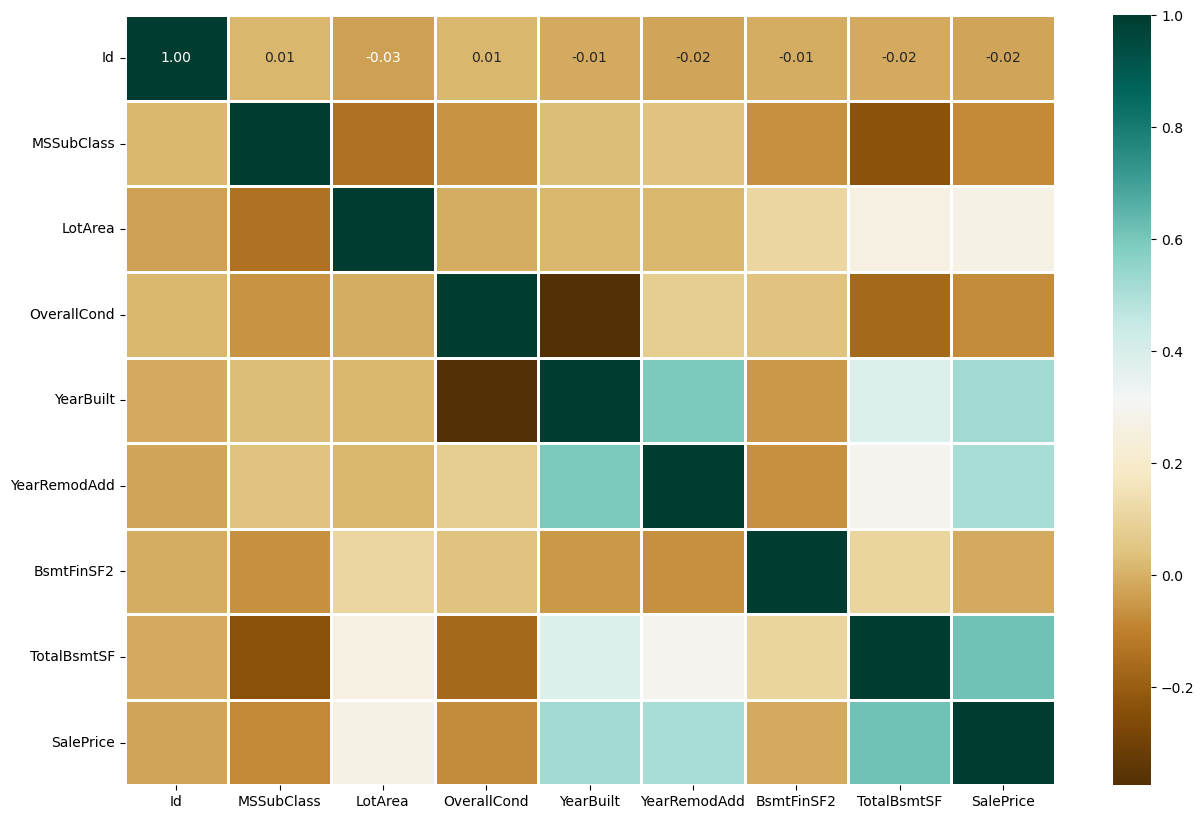

In [89]:
plt.figure(figsize=(15, 10))
sns.heatmap(numerical_dataset.corr(),
            cmap = 'BrBG',
            fmt = '.2f',
            linewidths = 1,
            annot = True,
            annot_kws={"size": 10})



In [90]:
#Analyzing the Catergorical Variates 
catergorical_dataset = dataset.select_dtypes(include=['object'])

print(catergorical_dataset)


     MSZoning LotConfig BldgType Exterior1st
0          RL    Inside     1Fam     VinylSd
1          RL       FR2     1Fam     MetalSd
2          RL    Inside     1Fam     VinylSd
3          RL    Corner     1Fam     Wd Sdng
4          RL       FR2     1Fam     VinylSd
...       ...       ...      ...         ...
2914       RM    Inside    Twnhs     CemntBd
2915       RM    Inside   TwnhsE     CemntBd
2916       RL    Inside     1Fam     VinylSd
2917       RL    Inside     1Fam     HdBoard
2918       RL    Inside     1Fam     HdBoard

[2919 rows x 4 columns]


MSZoning
RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: count, dtype: int64


<Axes: xlabel='MSZoning'>

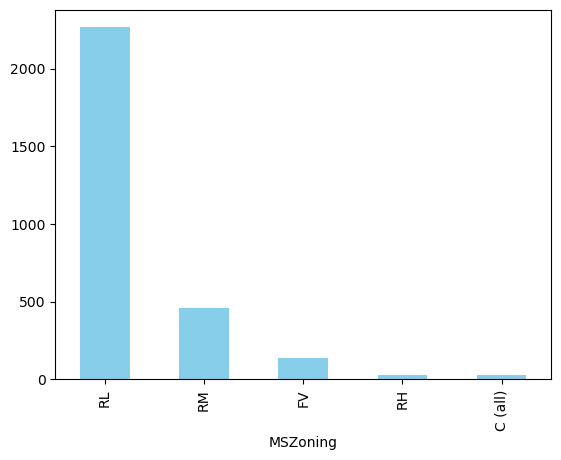

In [91]:
#derive the Unique values in MSZOning 
MSzone_unique = catergorical_dataset["MSZoning"].unique()

freq = catergorical_dataset["MSZoning"].value_counts()
print(freq)

freq.plot(kind='bar', color='skyblue')


In [92]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)
new_dataset = dataset.dropna()



In [93]:
from sklearn.preprocessing import OneHotEncoder

s = (new_dataset.dtypes == 'object')
object_cols = list(s[s].index)
print("Categorical variables:")
print(object_cols)
print('No. of. categorical features: ', 
      len(object_cols))


Categorical variables:
['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
No. of. categorical features:  4


In [96]:
OH_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
OH_cols = pd.DataFrame(OH_encoder.fit_transform(new_dataset[object_cols]))
OH_cols.index = new_dataset.index
OH_cols.columns = OH_encoder.get_feature_names_out()
df_final = new_dataset.drop(object_cols, axis=1)
df_final = pd.concat([df_final, OH_cols], axis=1)

# This code is modified by Susobhan Akhuli


In [97]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

X = df_final.drop(['SalePrice'], axis=1)
Y = df_final['SalePrice']

# Split the training set into 
# training and validation set
X_train, X_valid, Y_train, Y_valid = train_test_split(
    X, Y, train_size=0.8, test_size=0.2, random_state=0)


In [111]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error


model_SVR = svm.SVR()
model_SVR.fit(X_train,Y_train)
Y_pred = model_SVR.predict(X_valid)

print("SVR Model MAE:",mean_absolute_percentage_error(Y_valid, Y_pred))

model_LR = LinearRegression()
model_LR.fit(X_train, Y_train)
Y_pred = model_LR.predict(X_valid)

print("Linear Regression Model MAE:",mean_absolute_percentage_error(Y_valid, Y_pred))

model_RFR = RandomForestRegressor(n_estimators=10)
model_RFR.fit(X_train, Y_train)
Y_pred = model_RFR.predict(X_valid)

print("RandomForestRegressor MAE:",mean_absolute_percentage_error(Y_valid, Y_pred))



SVR Model MAE: 0.3009689871130911
Linear Regression Model MAE: 0.2064918635154848
RandomForestRegressor MAE: 0.1440900236343617


In [112]:
Y_pred


array([237830.        , 117740.        , 141300.        , 170900.        ,
        90250.        , 106600.        , 266249.6       , 118160.        ,
       516616.2       , 165860.4       , 222657.3       , 166410.        ,
       207000.        , 125500.        , 150188.7       , 145580.        ,
       191400.        , 155300.        , 148850.        , 124473.8       ,
       145510.        , 147498.33333333, 131800.        , 180350.        ,
       153880.        , 325437.9       , 173480.        ,  90250.        ,
       365370.6       , 120577.6       , 147420.        , 181050.        ,
       138730.        , 289250.        , 309578.1       , 202706.        ,
       240726.1       , 126350.        , 208227.5       , 292387.        ,
       183400.        , 100885.8       , 184249.        , 310487.4       ,
       307170.6       , 143775.        , 139790.        , 153900.        ,
       198980.        , 107800.        , 317816.7       , 137102.5       ,
       170525.        , 1

0.1432162902730062